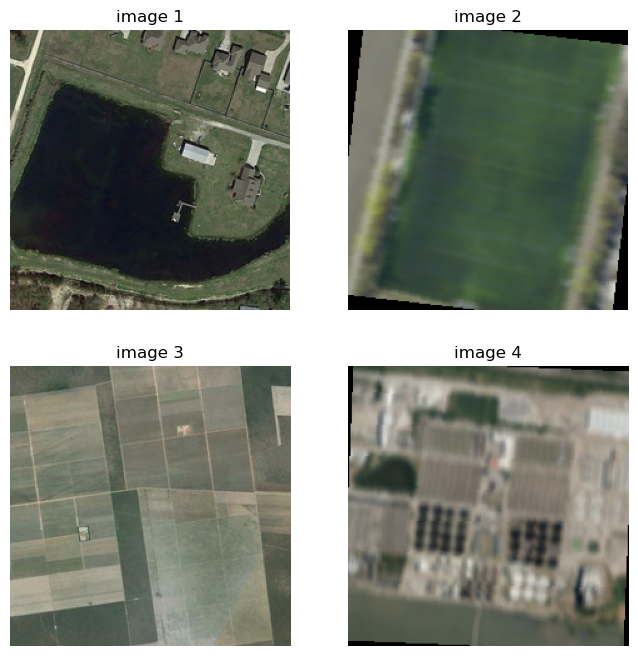

image 1 caption: an occasional pond is surrounded by some low vegetation and bushes.
image 2 caption: the beach is surrounded by natural green land.
image 3 caption: the work which is light and hangs on a sheet.
image 4 caption: a new group of workers were growing around the factory.


In [22]:
from RSICD import RSICD
import torch
import matplotlib.pyplot as plt

dataset = RSICD("./dataset_rsicd.json", "./RSICD_images")
figure = plt.figure(figsize=(8, 8))
captions = []

for i in range(1, 5): 
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    sample = dataset[sample_idx]
    figure.add_subplot(2, 2, i)
    captions.append(sample["caption"])
    plt.title(f"image {i}")
    plt.axis("off")
    plt.imshow(sample["image"].permute(1, 2, 0))
plt.show()

for i in range(len(captions)):
    print(f"image {i + 1} caption: {captions[i]}")
